In [84]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import cv2
import sklearn
import seaborn as sb 
from skimage.color import rgb2gray
from skimage.filters import laplace, sobel, roberts
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
import pickle
from sklearn.decomposition import PCA

In [36]:
img_paths = ['data_facture/blur/1blur.png','data_facture/blur/14blur.png','data_facture/blur/3blur.png']

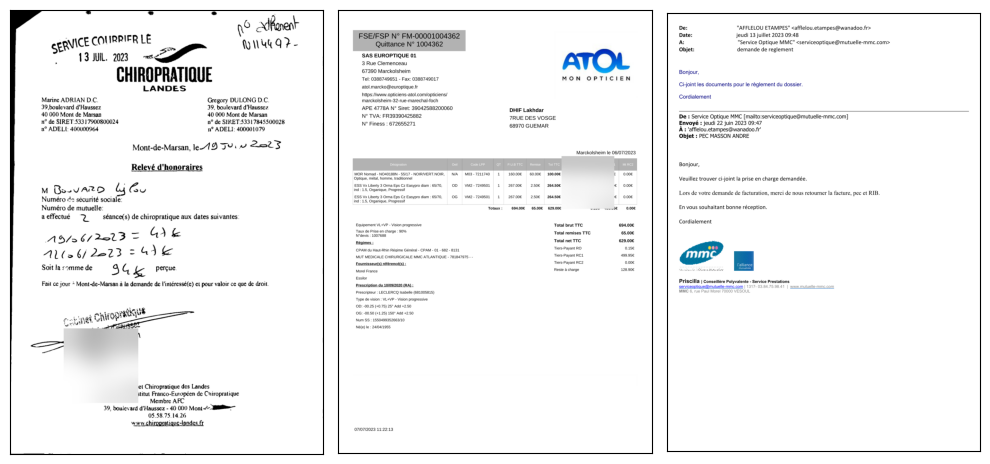

In [37]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=plt.imread(path[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

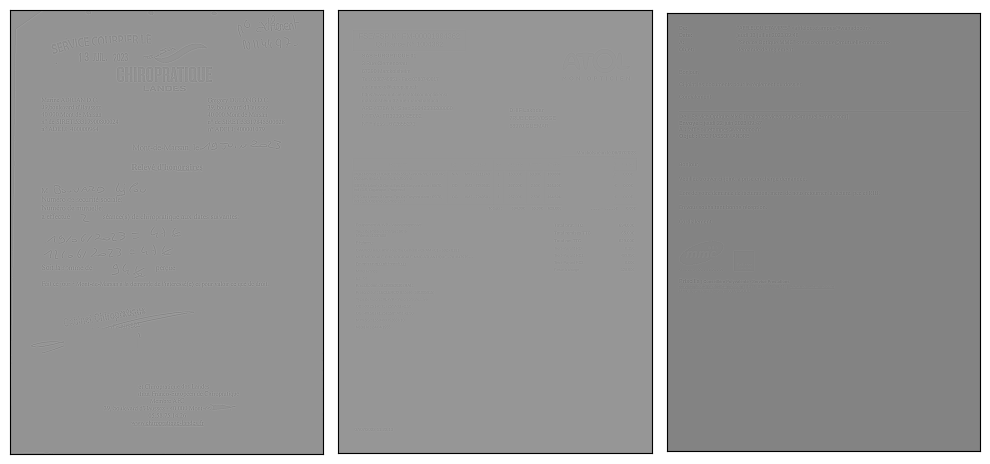

In [38]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = laplace(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

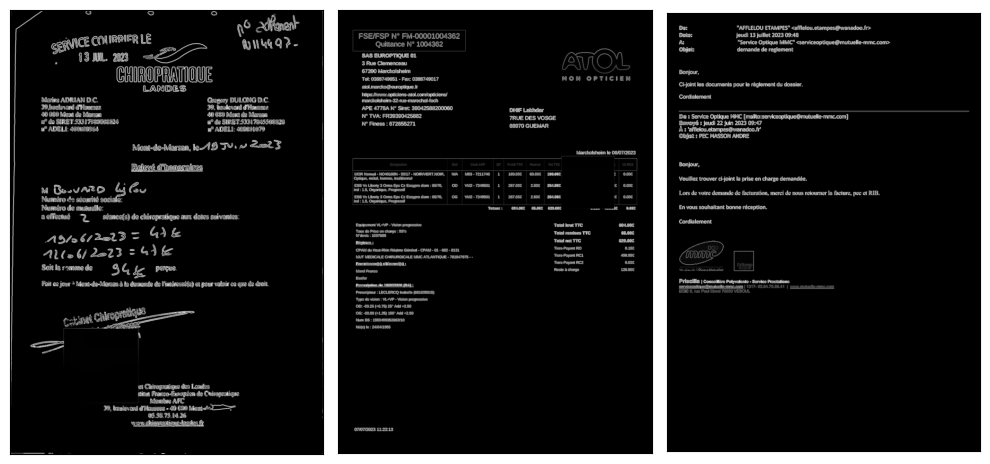

In [39]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = sobel(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

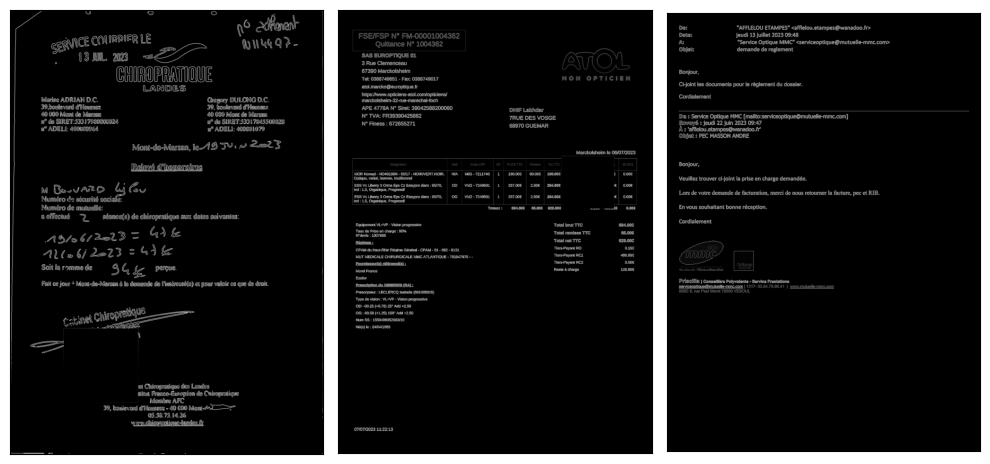

In [40]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = roberts(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

In [41]:
path_img_blur = "data_facture/blur"
path_img_sharp = "data_facture/sharp"

In [42]:
img_blur = os.listdir(path_img_blur)
img_sharp = os.listdir(path_img_sharp)

In [43]:
def get_data(path, images):
    features = []
    for img in images:
        feature = []
        image_gray = cv2.imread(os.path.join(path, img), 0)
            #faire recherche sur les filtres 
        if image_gray is not None:
            lap_feat = laplace(image_gray)
            sob_feat = sobel(image_gray)
            rob_feat = roberts(image_gray)

            # Vérifiez si les fonctionnalités ne sont pas None avant d'extraire les statistiques
            if lap_feat is not None and sob_feat is not None and rob_feat is not None:
                feature.extend([img, lap_feat.mean(), lap_feat.var(), np.amax(lap_feat),
                                sob_feat.mean(), sob_feat.var(), np.max(sob_feat),
                                rob_feat.mean(), rob_feat.var(), np.max(rob_feat)])
                
                features.append(feature)

    return features

In [44]:
sharp_feature = get_data(path_img_sharp, img_sharp)
blur_feature = get_data(path_img_blur, img_blur)

In [45]:
sharp_df = pd.DataFrame(sharp_feature, columns=['Image', 'Laplace_Mean', 'Laplace_Var', 'Laplace_Max',
                                                'Sobel_Mean', 'Sobel_Var', 'Sobel_Max',
                                                'Roberts_Mean', 'Roberts_Var', 'Roberts_Max'])

blur_df = pd.DataFrame(blur_feature, columns=['Image', 'Laplace_Mean', 'Laplace_Var', 'Laplace_Max',
                                              'Sobel_Mean', 'Sobel_Var', 'Sobel_Max',
                                              'Roberts_Mean', 'Roberts_Var', 'Roberts_Max'])

In [46]:
sharp_df.head()

,Image,Laplace_Mean,Laplace_Var,Laplace_Max,Sobel_Mean,Sobel_Var,Sobel_Max,Roberts_Mean,Roberts_Var,Roberts_Max
0,100sharp.png,3.301811e-18,0.012331,1.733333,0.028133,0.006483,0.750000,0.025615,0.005579,1.000000
1,101sharp.png,-6.081152e-19,0.049560,2.588235,0.043042,0.019390,0.787177,0.036887,0.018509,0.996078
2,102sharp.png,-4.625883e-20,0.019012,2.858824,0.018824,0.008841,0.788399,0.015622,0.008009,0.996078
3,103sharp.png,-4.557227e-19,0.054482,3.713725,0.046433,0.019635,0.785933,0.040780,0.019448,0.996078
4,104sharp.png,2.086787e-20,0.012395,2.313725,0.007584,0.003942,0.763371,0.006820,0.004094,1.000000


In [47]:
blur_df.head()

,Image,Laplace_Mean,Laplace_Var,Laplace_Max,Sobel_Mean,Sobel_Var,Sobel_Max,Roberts_Mean,Roberts_Var,Roberts_Max
0,100blur.png,-1.214974e-19,0.018615,2.337255,0.011496,0.005172,0.762120,0.010869,0.005720,1.000000
1,101blur.png,-8.222987e-18,0.006644,1.250980,0.015713,0.002899,0.627663,0.014490,0.002702,0.690241
2,102blur.png,5.573505e-18,0.019396,1.196078,0.035463,0.006478,0.506760,0.033275,0.006530,0.566670
3,103blur.png,4.877195e-19,0.089310,2.509804,0.051412,0.022696,0.766830,0.047746,0.026068,1.000000
4,104blur.png,-7.431282e-20,0.020807,2.376471,0.015435,0.007412,0.765829,0.013418,0.007411,1.000000


In [48]:
images=pd.concat([blur_df, sharp_df])

# all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((blur_df.shape[0], ))), axis=0)
df_yf = pd.DataFrame(y_f)
df_yf.columns = ['label']
x_train,x_test,y_train,y_test = train_test_split(images,y_f,test_size=0.20,stratify=df_yf)

In [49]:
x_train

,Image,Laplace_Mean,Laplace_Var,Laplace_Max,Sobel_Mean,Sobel_Var,Sobel_Max,Roberts_Mean,Roberts_Var,Roberts_Max
637,87sharp.png,-4.618980e-18,0.005851,1.192157,0.021525,0.004418,0.595075,0.017983,0.003400,0.570996
282,356sharp.png,1.974247e-19,0.084375,2.803922,0.065546,0.027002,0.785933,0.058976,0.028656,0.996078
515,566sharp.png,-9.050995e-19,0.086909,3.023529,0.075463,0.030429,0.788105,0.064912,0.029937,0.996078
299,370blur.png,-6.889171e-19,0.061926,2.458824,0.050195,0.020364,0.786850,0.044680,0.021292,0.996078
263,339sharp.png,-4.686176e-19,0.038724,2.635294,0.035700,0.016897,0.785957,0.030056,0.015418,0.996078
...,...,...,...,...,...,...,...,...,...,...
448,505sharp.png,-3.276415e-19,0.060940,2.976471,0.041711,0.017465,0.787177,0.038777,0.018088,0.996078
492,544blur.png,-4.094137e-19,0.042569,3.337255,0.035339,0.015242,0.785921,0.030909,0.014750,0.996078
246,323sharp.png,-7.203347e-18,0.033824,1.796078,0.053192,0.015527,0.673138,0.046864,0.013778,0.745139
495,547blur.png,-9.299924e-20,0.005344,2.552941,0.004525,0.002232,0.773194,0.003792,0.002044,0.996078


In [50]:
x_train1 = x_train[['Laplace_Mean', 'Laplace_Var', 'Laplace_Max', 'Sobel_Mean',
       'Sobel_Var', 'Sobel_Max', 'Roberts_Mean', 'Roberts_Var', 'Roberts_Max']]

In [51]:
x_test1 = x_test[['Laplace_Mean', 'Laplace_Var', 'Laplace_Max', 'Sobel_Mean',
       'Sobel_Var', 'Sobel_Max', 'Roberts_Mean', 'Roberts_Var', 'Roberts_Max']]

In [52]:
x_test.shape

(261, 10)

In [55]:
param_grid = {'C': [1,10,100,1000], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [105]:
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)

In [108]:
pca.explained_variance_ratio_.sum()

0.9999932475773607

In [106]:
svm_model = svm.SVC()

# Create GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train_pca, y_train)


# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final SVM model
final_svm_model = svm.SVC(**best_params)
final_svm_model.fit(x_train_pca, y_train)

file_save = "model_vgg/final_svm.pkl"
with open(file_save, 'wb') as file:
    pickle.dump(final_svm_model, file)


Best Parameters: {'C': 100, 'kernel': 'sigmoid'}


In [107]:
pred = final_svm_model.predict(x_test_pca)


print('Accuracy:', accuracy_score(y_test, pred))
print('Confusion matrix:\n', confusion_matrix(y_test, pred))
print('F1_score:', f1_score(y_test, pred))
print('Classification_report:\n', classification_report(y_test, pred))

Accuracy: 0.4904214559386973
Confusion matrix:
 [[67 64]
 [69 61]]
F1_score: 0.4784313725490196
Classification_report:
               precision    recall  f1-score   support

         0.0       0.49      0.51      0.50       131
         1.0       0.49      0.47      0.48       130

    accuracy                           0.49       261
   macro avg       0.49      0.49      0.49       261
weighted avg       0.49      0.49      0.49       261



In [88]:
test_image=x_test[['Image']]

In [89]:
test_image

,Image
511,562sharp.png
160,246sharp.png
108,199blur.png
224,302blur.png
493,546sharp.png
...,...
195,278sharp.png
558,604sharp.png
621,72sharp.png
208,28sharp.png


In [90]:
test_pred=pd.DataFrame(pred)

In [91]:
test_pred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
256,0.0
257,1.0
258,0.0
259,0.0


In [92]:
test_original=pd.DataFrame(y_test)

In [93]:
test_original.dropna()

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
256,0.0
257,0.0
258,0.0
259,0.0


In [94]:
new_df= test_image.merge(test_original, left_index=True,right_index=True)

In [95]:
df=pd.DataFrame()

In [96]:
df['image']=test_image["Image"]

In [97]:
test_original.columns=["original"]

In [98]:
df['original']=test_original["original"]

In [99]:
df["pred"]=test_pred

In [100]:
df

,image,original,pred
511,562sharp.png,NaN,NaN
160,246sharp.png,1.0,1.0
108,199blur.png,0.0,0.0
224,302blur.png,0.0,0.0
493,546sharp.png,NaN,NaN
...,...,...,...
195,278sharp.png,0.0,0.0
558,604sharp.png,NaN,NaN
621,72sharp.png,NaN,NaN
208,28sharp.png,1.0,1.0


In [101]:
# permet de visualiser les datas dans excel
df.to_excel('res_excel/res.xlsx')

In [102]:
test_original.to_excel('res_excel/test.xlsx')

In [103]:
test_pred.to_excel('res_excel/test_pred.xlsx')

In [104]:
test_image.to_excel('res_excel/test_image.xlsx')